# La consigna decia que podiamos poner tantos notebooks como nos parezca, quizas podemos hacer uno sobre los datos, como preprocesamos etc y otro sobre los modelos?? ni idea, desp vemos que formato nos copa, x ahora le puse este nombre al archivo pero desp cambiamos segun nos parezca

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from src.utils import filtrar_meses, verificar_columnas_y_tipos, estandarizar_nombres_columnas
from src.utils import funciones 

In [3]:
ruta_24 = "data/recorridos/raw/trips_2024.csv"
data_24 = pd.read_csv(ruta_24)
meses_a_eliminar = [9, 10, 11, 12]
data_pr_24_a, filas_eliminadas_a = filtrar_meses(data_24, "fecha_origen_recorrido", meses_a_eliminar)
print(f"Se eliminaron {filas_eliminadas_a} filas.")
data_pr_24, filas_eliminadas = filtrar_meses(data_pr_24_a, "fecha_destino_recorrido", meses_a_eliminar)
print(f"Se eliminaron {filas_eliminadas} filas.")
ruta_salida = "data/recorridos/processed/trips_2024_pr.csv"
data_pr_24.to_csv(ruta_salida, index=False) #elimina los viajes que arrnacaron desde agosto en adelante y tambien aquellos terminados en agosto 
#(ejemplo uno q arranco la ultima noche del mes de julio y termino en agosto) Es correcto?? o deberiamos quedarnos con esos??

Se eliminaron 1403639 filas.
Se eliminaron 22 filas.


In [4]:
df_2020 = pd.read_csv("data/recorridos/raw/trips_2020.csv", index_col=0)
df_2020 = df_2020.reset_index(drop=True)
df_2020.to_csv("data/recorridos/processed/trips_2020_pr.csv", index=False)

df_2021 = pd.read_csv("data/recorridos/raw/trips_2021.csv", index_col=0)
df_2021 = df_2021.drop(columns=[col for col in ['Género'] if col in df_2021.columns])
df_2021 = df_2021.reset_index(drop=True)
df_2021.to_csv("data/recorridos/processed/trips_2021_pr.csv", index=False)

df_2022 = pd.read_csv("data/recorridos/raw/trips_2022.csv", index_col=0)
df_2022 = df_2022.drop(columns=[col for col in ['X'] if col in df_2022.columns])
df_2022 = df_2022.reset_index(drop=True)
df_2022.to_csv("data/recorridos/processed/trips_2022_pr.csv", index=False)

df_2023 = pd.read_csv("data/recorridos/raw/trips_2023.csv", index_col=0)
df_2023 = df_2023.reset_index(drop=True)
df_2023.to_csv("data/recorridos/processed/trips_2023_pr.csv", index=False)

C:\Users\catal\AppData\Local\Temp\ipykernel_29604\2246478468.py:5: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2021 = pd.read_csv("data/recorridos/raw/trips_2021.csv", index_col=0)


In [5]:

def forzar_tipos(df, columnas, tipo):
    for col in columnas:
        if col in df.columns:
            df[col] = df[col].astype(tipo)
    return df

archivos = [
    "data/recorridos/processed/trips_2020_pr.csv",
    "data/recorridos/processed/trips_2021_pr.csv",
    "data/recorridos/processed/trips_2022_pr.csv",
    "data/recorridos/processed/trips_2023_pr.csv",
    "data/recorridos/processed/trips_2024_pr.csv",
]
estandarizar_nombres_columnas(archivos)
anios = [2020, 2021, 2022, 2023]

for anio in [2020, 2023]:
    ruta = f"data/recorridos/processed/trips_{anio}_pr.csv"
    df = pd.read_csv(ruta)
    df = df.dropna()
    df.to_csv(ruta, index=False)

for anio in anios:
    print(f"Procesando año {anio}...")
    ruta = f"data/recorridos/processed/trips_{anio}_pr.csv"
    df = pd.read_csv(ruta)
    df_limpio = funciones[str(anio)](df)
    df_limpio = forzar_tipos(df_limpio, ["id_usuario"], 'float64')
    df_limpio.to_csv(ruta, index=False)

verificar_columnas_y_tipos(archivos)


c:\Users\catal\OneDrive\Documents\UDESA\AñoIII\Machine Learning\Proyecto_Final\FINAL_ML\src\utils.py:57: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(archivo)


No se encontraron columnas para renombrar en data/recorridos/processed/trips_2024_pr.csv.
Procesando año 2020...
Procesando año 2021...


C:\Users\catal\AppData\Local\Temp\ipykernel_29604\849129395.py:26: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta)


Procesando año 2022...
Procesando año 2023...


c:\Users\catal\OneDrive\Documents\UDESA\AñoIII\Machine Learning\Proyecto_Final\FINAL_ML\src\utils.py:15: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(archivo)



Usando 'data/recorridos/processed/trips_2024_pr.csv' como referencia.

Verificando: data/recorridos/processed/trips_2020_pr.csv
✅ Columnas iguales.
✅ Tipos de datos iguales.
----------------------------------------
Verificando: data/recorridos/processed/trips_2021_pr.csv
✅ Columnas iguales.
✅ Tipos de datos iguales.
----------------------------------------
Verificando: data/recorridos/processed/trips_2022_pr.csv
✅ Columnas iguales.
✅ Tipos de datos iguales.
----------------------------------------
Verificando: data/recorridos/processed/trips_2023_pr.csv
✅ Columnas iguales.
✅ Tipos de datos iguales.
----------------------------------------
Verificando: data/recorridos/processed/trips_2024_pr.csv
✅ Columnas iguales.
✅ Tipos de datos iguales.
----------------------------------------


In [6]:
import pandas as pd
import os

# Configuración para ver todo el DataFrame sin truncamiento
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)

archivos = [
    "data/recorridos/processed/trips_2020_pr.csv",
    "data/recorridos/processed/trips_2021_pr.csv",
    "data/recorridos/processed/trips_2022_pr.csv",
    "data/recorridos/processed/trips_2023_pr.csv",
    "data/recorridos/processed/trips_2024_pr.csv",
]

anios = [2020, 2021, 2022, 2023, 2024]
estaciones_por_anio = {}

# Leer y acumular estaciones por año (por ID)
for archivo, anio in zip(archivos, anios):
    if not os.path.exists(archivo):
        print(f"⚠️ Archivo no encontrado para el año {anio}")
        continue

    df = pd.read_csv(archivo)
    estaciones_origen = df['id_estacion_origen'].dropna().unique()
    estaciones_destino = df['id_estacion_destino'].dropna().unique()
    estaciones = set(estaciones_origen).union(set(estaciones_destino))
    estaciones_por_anio[anio] = estaciones

# Construcción de tabla de presencia
todas_las_estaciones = sorted(set.union(*estaciones_por_anio.values()))
tabla_presencia = pd.DataFrame(index=todas_las_estaciones)

for anio in anios:
    estaciones = estaciones_por_anio.get(anio, set())
    tabla_presencia[anio] = ["✓" if est in estaciones else "" for est in tabla_presencia.index]

# Contar cuántos años aparece cada estación
tabla_presencia["Anios_presente"] = tabla_presencia[anios].apply(lambda row: sum(cell == "✓" for cell in row), axis=1)

# Ordenar por cantidad de años presente (ascendente)

tabla_presencia = tabla_presencia.sort_index()
# Mostrar tabla completa
print("\n📋 Presencia de estaciones por año (por ID, ordenadas por cantidad de años presentes):")
print(tabla_presencia)

# Mostrar cantidad total de estaciones por año
print("\n📈 Cantidad de estaciones por año:")
for anio in anios:
    cantidad = len(estaciones_por_anio.get(anio, set()))
    print(f"  - {anio}: {cantidad} estaciones")

C:\Users\catal\AppData\Local\Temp\ipykernel_29604\4068507259.py:27: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(archivo)



📋 Presencia de estaciones por año (por ID, ordenadas por cantidad de años presentes):
    2020 2021 2022 2023 2024  Anios_presente
2      ✓    ✓    ✓    ✓    ✓               5
3      ✓    ✓    ✓    ✓    ✓               5
4      ✓    ✓    ✓    ✓    ✓               5
5      ✓    ✓    ✓    ✓    ✓               5
6      ✓    ✓    ✓    ✓    ✓               5
7      ✓    ✓    ✓    ✓    ✓               5
8      ✓    ✓    ✓    ✓    ✓               5
9      ✓    ✓    ✓    ✓    ✓               5
11     ✓                                   1
12     ✓    ✓    ✓    ✓    ✓               5
13     ✓    ✓    ✓    ✓    ✓               5
14     ✓    ✓    ✓    ✓    ✓               5
15     ✓                                   1
17     ✓    ✓    ✓    ✓    ✓               5
19     ✓                                   1
20     ✓    ✓    ✓                         3
21     ✓    ✓    ✓    ✓    ✓               5
22     ✓    ✓    ✓    ✓    ✓               5
23     ✓    ✓    ✓    ✓    ✓               5
24     ✓    ✓

In [7]:
print("\n🔍 Estaciones que aparecían en años anteriores pero NO en 2024:")

estaciones_2024 = estaciones_por_anio.get(2024, set())

for anio in [2020, 2021, 2022, 2023]:
    estaciones_anio = estaciones_por_anio.get(anio, set())
    solo_en_anio = sorted(estaciones_anio - estaciones_2024)
    print(f"\n➡️ Estaciones en {anio} pero NO en 2024 ({len(solo_en_anio)}):")
    print(solo_en_anio)


🔍 Estaciones que aparecían en años anteriores pero NO en 2024:

➡️ Estaciones en 2020 pero NO en 2024 (121):
[np.int64(11), np.int64(15), np.int64(19), np.int64(20), np.int64(28), np.int64(30), np.int64(31), np.int64(39), np.int64(40), np.int64(42), np.int64(47), np.int64(52), np.int64(53), np.int64(55), np.int64(62), np.int64(72), np.int64(78), np.int64(84), np.int64(88), np.int64(90), np.int64(95), np.int64(105), np.int64(106), np.int64(110), np.int64(115), np.int64(119), np.int64(127), np.int64(141), np.int64(143), np.int64(154), np.int64(170), np.int64(173), np.int64(180), np.int64(185), np.int64(192), np.int64(195), np.int64(201), np.int64(205), np.int64(214), np.int64(217), np.int64(218), np.int64(221), np.int64(224), np.int64(225), np.int64(226), np.int64(233), np.int64(238), np.int64(240), np.int64(244), np.int64(246), np.int64(249), np.int64(250), np.int64(256), np.int64(266), np.int64(272), np.int64(274), np.int64(276), np.int64(279), np.int64(282), np.int64(283), np.int64(2

In [8]:
from src.utils import verificar_consistencia_coordenadas

# Verificar 2024
verificar_consistencia_coordenadas("data/recorridos/processed/trips_2024_pr.csv", anio=2024)



🔍 Verificando consistencia de coordenadas en 2024...
✅ Todas las estaciones tienen coordenadas consistentes.


In [9]:
import pandas as pd
import os

# Cargar dataset de 2024
df_2024 = pd.read_csv("data/recorridos/processed/trips_2024_pr.csv")

# Construir diccionario con coordenadas por estación
coords_2024 = {}

for rol in ["origen", "destino"]:
    id_col = f"id_estacion_{rol}"
    lat_col = f"lat_estacion_{rol}"
    lon_col = f"long_estacion_{rol}"

    for _, row in df_2024.iterrows():
        est_id = row[id_col]
        lat = row[lat_col]
        lon = row[lon_col]
        if pd.notna(est_id) and pd.notna(lat) and pd.notna(lon):
            coords_2024[est_id] = (lat, lon)

# Archivos a procesar (los que serán modificados in-place)
archivos = {
    2020: "data/recorridos/processed/trips_2020_pr.csv",
    2021: "data/recorridos/processed/trips_2021_pr.csv",
    2022: "data/recorridos/processed/trips_2022_pr.csv",
    2023: "data/recorridos/processed/trips_2023_pr.csv",
}

for anio, path in archivos.items():
    if not os.path.exists(path):
        print(f"⚠️ No se encontró el archivo de {anio}")
        continue

    df = pd.read_csv(path)
    
    for rol in ["origen", "destino"]:
        id_col = f"id_estacion_{rol}"
        lat_col = f"lat_estacion_{rol}"
        lon_col = f"long_estacion_{rol}"

        def corregir_coord(row):
            est_id = row[id_col]
            if est_id in coords_2024:
                lat, lon = coords_2024[est_id]
                row[lat_col] = lat
                row[lon_col] = lon
            return row

        df = df.apply(corregir_coord, axis=1)

    # Guardar sobrescribiendo el archivo original
    df.to_csv(path, index=False)
    print(f"✅ Archivo actualizado y sobrescrito: {path}")

✅ Archivo actualizado y sobrescrito: data/recorridos/processed/trips_2020_pr.csv


C:\Users\catal\AppData\Local\Temp\ipykernel_29604\3849642278.py:35: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


✅ Archivo actualizado y sobrescrito: data/recorridos/processed/trips_2021_pr.csv
✅ Archivo actualizado y sobrescrito: data/recorridos/processed/trips_2022_pr.csv
✅ Archivo actualizado y sobrescrito: data/recorridos/processed/trips_2023_pr.csv


In [10]:
from src.utils import corregir_longitudes_inconsistentes
corregir_longitudes_inconsistentes("data/recorridos/processed/trips_2021_pr.csv")

c:\Users\catal\OneDrive\Documents\UDESA\AñoIII\Machine Learning\Proyecto_Final\FINAL_ML\src\utils.py:175: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path_csv)


✅ Longitudes corregidas automáticamente en: data/recorridos/processed/trips_2021_pr.csv


In [11]:
from src.utils import corregir_latitud_estacion

path_2020 = "data/recorridos/processed/trips_2020_pr.csv"
df_2020 = pd.read_csv(path_2020)
df_2020 = corregir_latitud_estacion(df_2020, est_id=240)
df_2020.to_csv(path_2020, index=False)
corregir_longitudes_inconsistentes("data/recorridos/processed/trips_2020_pr.csv")

ℹ️ Latitud de referencia para estación 240: -34.558137
✅ Longitudes corregidas automáticamente en: data/recorridos/processed/trips_2020_pr.csv


In [12]:
for anio in [2020, 2021, 2022, 2023]:
    path = f"data/recorridos/processed/trips_{anio}_pr.csv" 
    verificar_consistencia_coordenadas(path, anio=anio)


🔍 Verificando consistencia de coordenadas en 2020...
✅ Todas las estaciones tienen coordenadas consistentes.


c:\Users\catal\OneDrive\Documents\UDESA\AñoIII\Machine Learning\Proyecto_Final\FINAL_ML\src\utils.py:131: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path_csv)



🔍 Verificando consistencia de coordenadas en 2021...
✅ Todas las estaciones tienen coordenadas consistentes.

🔍 Verificando consistencia de coordenadas en 2022...
✅ Todas las estaciones tienen coordenadas consistentes.

🔍 Verificando consistencia de coordenadas en 2023...
✅ Todas las estaciones tienen coordenadas consistentes.


In [13]:
import pandas as pd
import os

# Rutas de los datasets en orden descendente
archivos = [
    "data/recorridos/processed/trips_2024_pr.csv",
    "data/recorridos/processed/trips_2023_pr.csv",
    "data/recorridos/processed/trips_2022_pr.csv",
    "data/recorridos/processed/trips_2021_pr.csv",
    "data/recorridos/processed/trips_2020_pr.csv"
]

# Diccionario de estaciones únicas: id_estacion -> (lat, lon)
estaciones_dict = {}

for path in archivos:
    if not os.path.exists(path):
        print(f"⚠️ Archivo no encontrado: {path}")
        continue

    df = pd.read_csv(path)

    for rol in ["origen", "destino"]:
        for _, row in df.iterrows():
            est_id = row[f"id_estacion_{rol}"]
            lat = row[f"lat_estacion_{rol}"]
            lon = row[f"long_estacion_{rol}"]

            if pd.notna(est_id) and pd.notna(lat) and pd.notna(lon):
                if est_id not in estaciones_dict:
                    estaciones_dict[est_id] = (lat, lon)
        

C:\Users\catal\AppData\Local\Temp\ipykernel_29604\2191551204.py:21: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


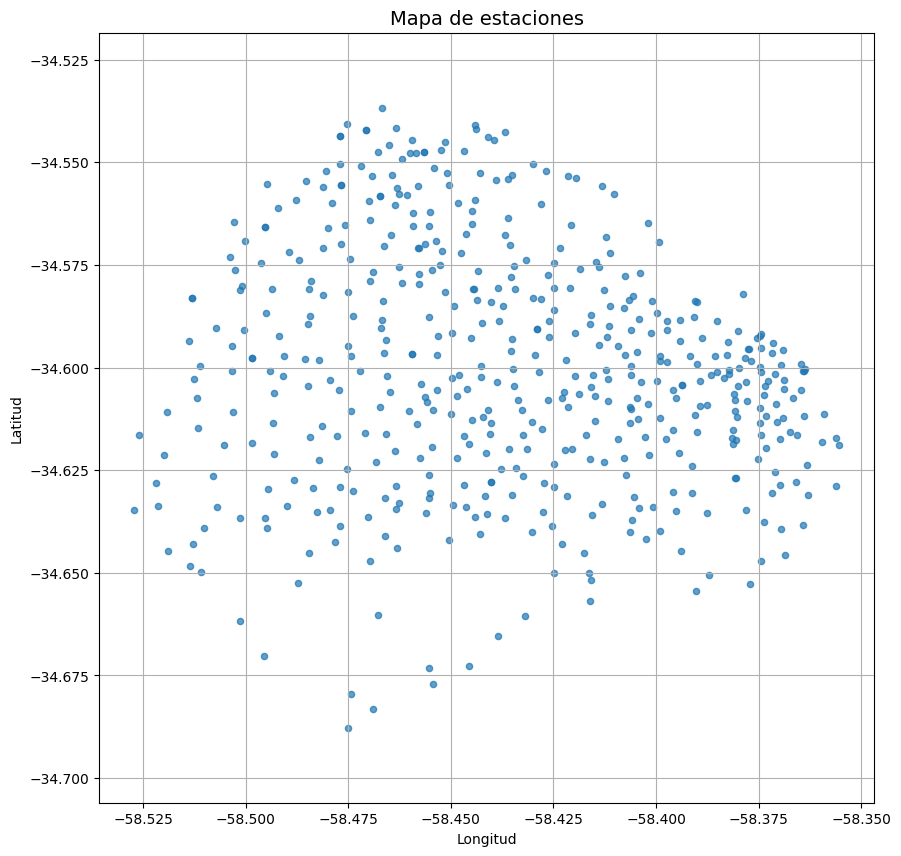

In [14]:
df_estaciones = pd.DataFrame([
    {"id_estacion": est_id, "lat": lat, "lon": lon}
    for est_id, (lat, lon) in estaciones_dict.items()
])
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(df_estaciones["lon"], df_estaciones["lat"], alpha=0.7, s=20)
plt.title("Mapa de estaciones", fontsize=14)
plt.xlabel("Longitud", color="black")
plt.ylabel("Latitud", color="black")
plt.grid(True)
plt.axis("equal")
plt.show()

In [15]:
import geopandas as gpd

barrios_gdf = gpd.read_file("data/barrios/barrios.shp")

# Ver columnas reales
print("🧩 Columnas disponibles en el shapefile:")
print(barrios_gdf.columns)

🧩 Columnas disponibles en el shapefile:
Index(['id', 'objeto', 'nombre', 'comuna', 'perimetro_', 'area_metro',
       'geometry'],
      dtype='object')


In [16]:
print("📊 Cantidad de barrios únicos en el shapefile:", barrios_gdf["nombre"].nunique())

print("\n🗺️ Barrios:")
print(sorted(barrios_gdf["nombre"].unique()))
#total de barrios: 
print("Total de barrios:", len(barrios_gdf["nombre"].unique()))

📊 Cantidad de barrios únicos en el shapefile: 48

🗺️ Barrios:
['AGRONOMIA', 'ALMAGRO', 'BALVANERA', 'BARRACAS', 'BELGRANO', 'BOCA', 'BOEDO', 'CABALLITO', 'CHACARITA', 'COGHLAN', 'COLEGIALES', 'CONSTITUCION', 'FLORES', 'FLORESTA', 'LINIERS', 'MATADEROS', 'MONSERRAT', 'MONTE CASTRO', 'NUEVA POMPEYA', 'NUÑEZ', 'PALERMO', 'PARQUE AVELLANEDA', 'PARQUE CHACABUCO', 'PARQUE CHAS', 'PARQUE PATRICIOS', 'PATERNAL', 'PUERTO MADERO', 'RECOLETA', 'RETIRO', 'SAAVEDRA', 'SAN CRISTOBAL', 'SAN NICOLAS', 'SAN TELMO', 'VELEZ SARSFIELD', 'VERSALLES', 'VILLA CRESPO', 'VILLA DEL PARQUE', 'VILLA DEVOTO', 'VILLA GRAL. MITRE', 'VILLA LUGANO', 'VILLA LURO', 'VILLA ORTUZAR', 'VILLA PUEYRREDON', 'VILLA REAL', 'VILLA RIACHUELO', 'VILLA SANTA RITA', 'VILLA SOLDATI', 'VILLA URQUIZA']
Total de barrios: 48


In [17]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Cargar shapefile de barrios
barrios_gdf = gpd.read_file("data/barrios/barrios.shp")

if "nombre" in barrios_gdf.columns and "barrio" not in barrios_gdf.columns:
    barrios_gdf = barrios_gdf.rename(columns={"nombre": "barrio"})

# Crear GeoDataFrame desde df_estaciones (ya lo tenés construido)
df_estaciones["geometry"] = df_estaciones.apply(lambda row: Point(row["lon"], row["lat"]), axis=1)
estaciones_gdf = gpd.GeoDataFrame(df_estaciones, geometry="geometry", crs=barrios_gdf.crs)

# Join espacial (punto dentro de polígono)
estaciones_con_barrios = gpd.sjoin(estaciones_gdf, barrios_gdf, how="left", predicate="within")

# Crear CSV (opcional)
estaciones_con_barrios[["id_estacion", "lat", "lon", "barrio"]].to_csv("data/estaciones_con_barrios.csv", index=False)

# Crear diccionario: id_estacion -> barrio
mapa_barrio = estaciones_con_barrios.set_index("id_estacion")["barrio"].to_dict()

# Sobrescribir manualmente los valores deseados
mapa_barrio[111] = "PUERTO MADERO"
mapa_barrio[541] = "PALERMO"

# Enriquecer cada dataset
for anio in [2020, 2021, 2022, 2023, 2024]:
    path = f"data/recorridos/processed/trips_{anio}_pr.csv"
    df = pd.read_csv(path)

    df["barrio_origen"] = df["id_estacion_origen"].map(mapa_barrio)
    df["barrio_destino"] = df["id_estacion_destino"].map(mapa_barrio)

    df.to_csv(path, index=False)
    print(f"✅ Enriquecido con barrios: {anio}")

✅ Enriquecido con barrios: 2020


C:\Users\catal\AppData\Local\Temp\ipykernel_29604\948960304.py:31: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


✅ Enriquecido con barrios: 2021
✅ Enriquecido con barrios: 2022
✅ Enriquecido con barrios: 2023
✅ Enriquecido con barrios: 2024


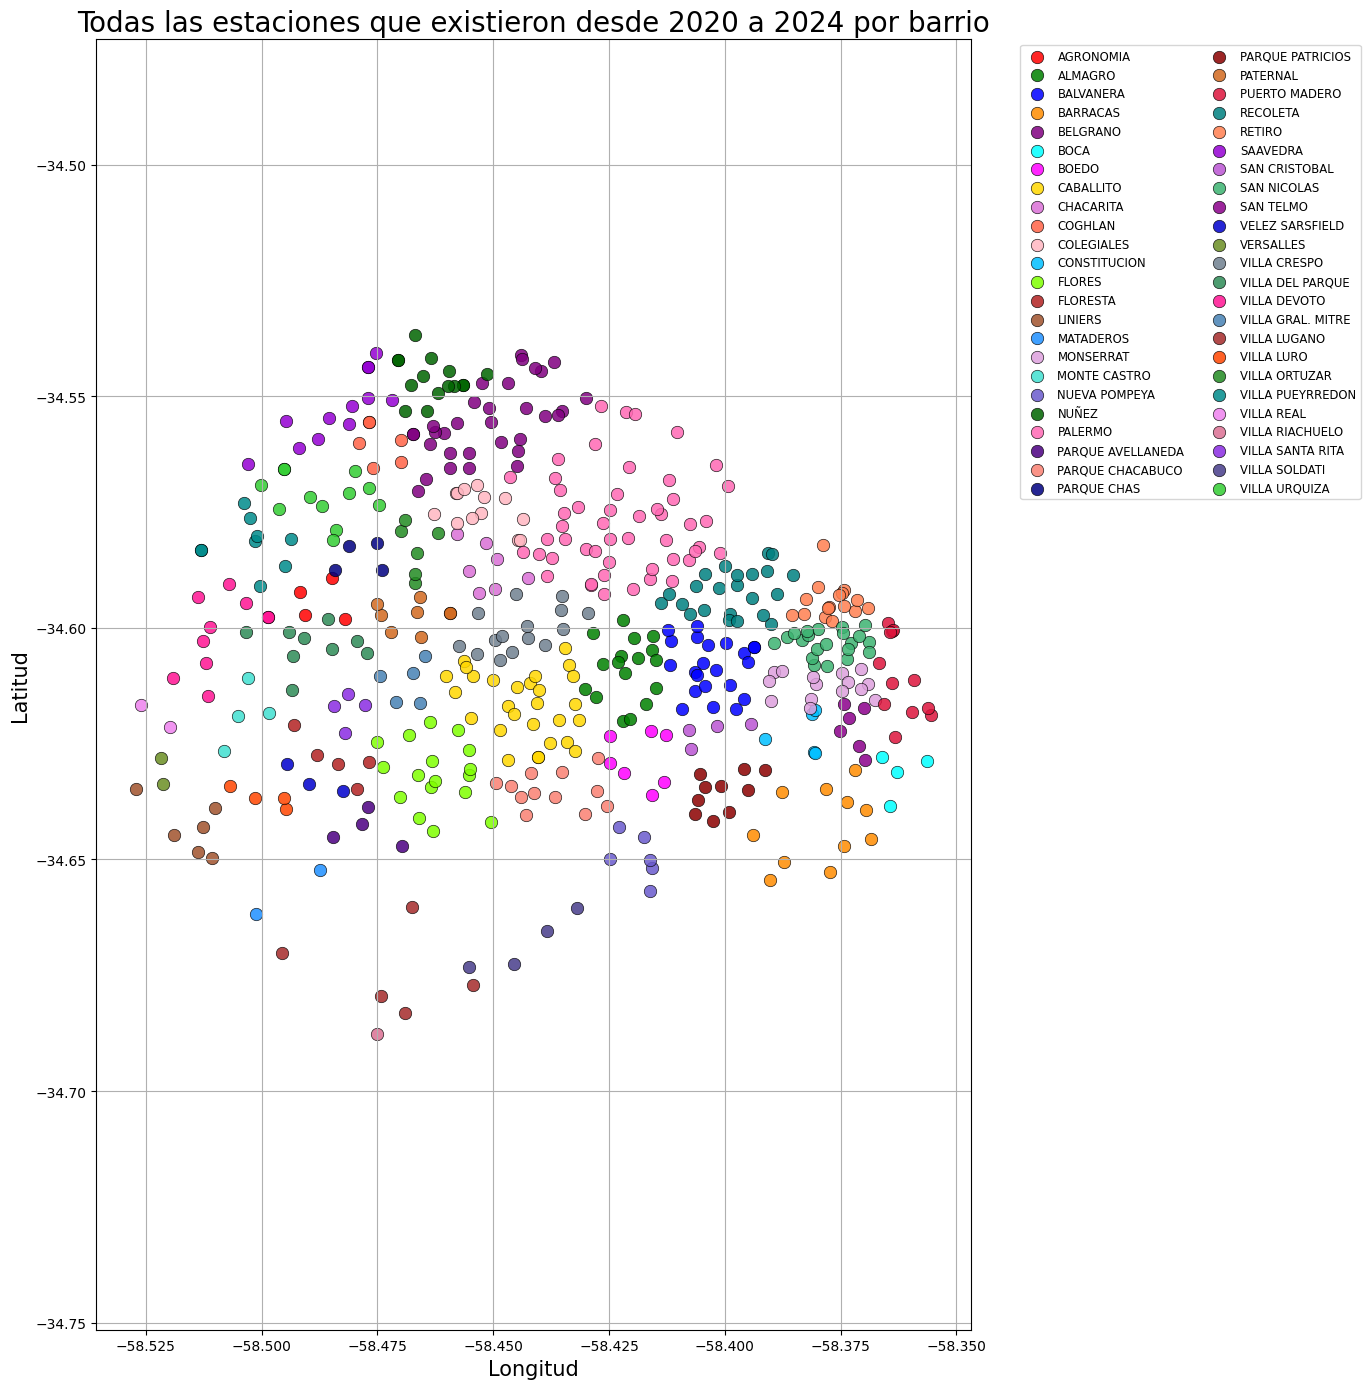

In [18]:
colores_barrios = [
    "red", "green", "blue", "darkorange", "purple", "cyan", "magenta", "gold",
    "orchid", "tomato", "lightpink", "deepskyblue", "chartreuse", "firebrick", "sienna", "dodgerblue",
    "plum", "turquoise", "slateblue", "darkgreen", "hotpink", "indigo", "salmon", "navy",
    "darkred", "chocolate", "crimson", "teal", "coral", "darkviolet", "mediumorchid", "mediumseagreen",
    "darkmagenta", "mediumblue", "olivedrab", "slategray", "seagreen", "deeppink", "steelblue", "brown",
    "orangered", "forestgreen", "darkcyan", "violet", "palevioletred", "blueviolet", "darkslateblue", "limegreen"
]
import matplotlib.pyplot as plt

# Lista ordenada de barrios únicos
barrios_unicos = sorted(estaciones_con_barrios["barrio"].dropna().unique())

# Mapear barrio → color
color_dict = {barrio: colores_barrios[i % len(colores_barrios)] for i, barrio in enumerate(barrios_unicos)}

# Plot
plt.figure(figsize=(14, 14))
ax = plt.gca()

for barrio, grupo in estaciones_con_barrios.groupby("barrio"):
    color = color_dict.get(barrio, "gray")  # fallback
    ax.scatter(
        grupo["lon"], grupo["lat"],
        label=barrio,
        color=color,
        edgecolors="black",
        linewidths=0.5,
        s=80,
        alpha=0.85
    )

plt.title("Todas las estaciones que existieron desde 2020 a 2024 por barrio", fontsize=20)
plt.xlabel("Longitud", color="black", fontsize=15)
plt.ylabel("Latitud", color="black", fontsize=15)
plt.axis("equal")
plt.grid(True)
plt.legend(fontsize="small", bbox_to_anchor=(1.05, 1), loc="upper left", ncol=2)
plt.tight_layout()
plt.show()

C:\Users\catal\AppData\Local\Temp\ipykernel_29604\2339866491.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab20", len(barrios_unicos))
C:\Users\catal\AppData\Local\Temp\ipykernel_29604\2339866491.py:39: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\catal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


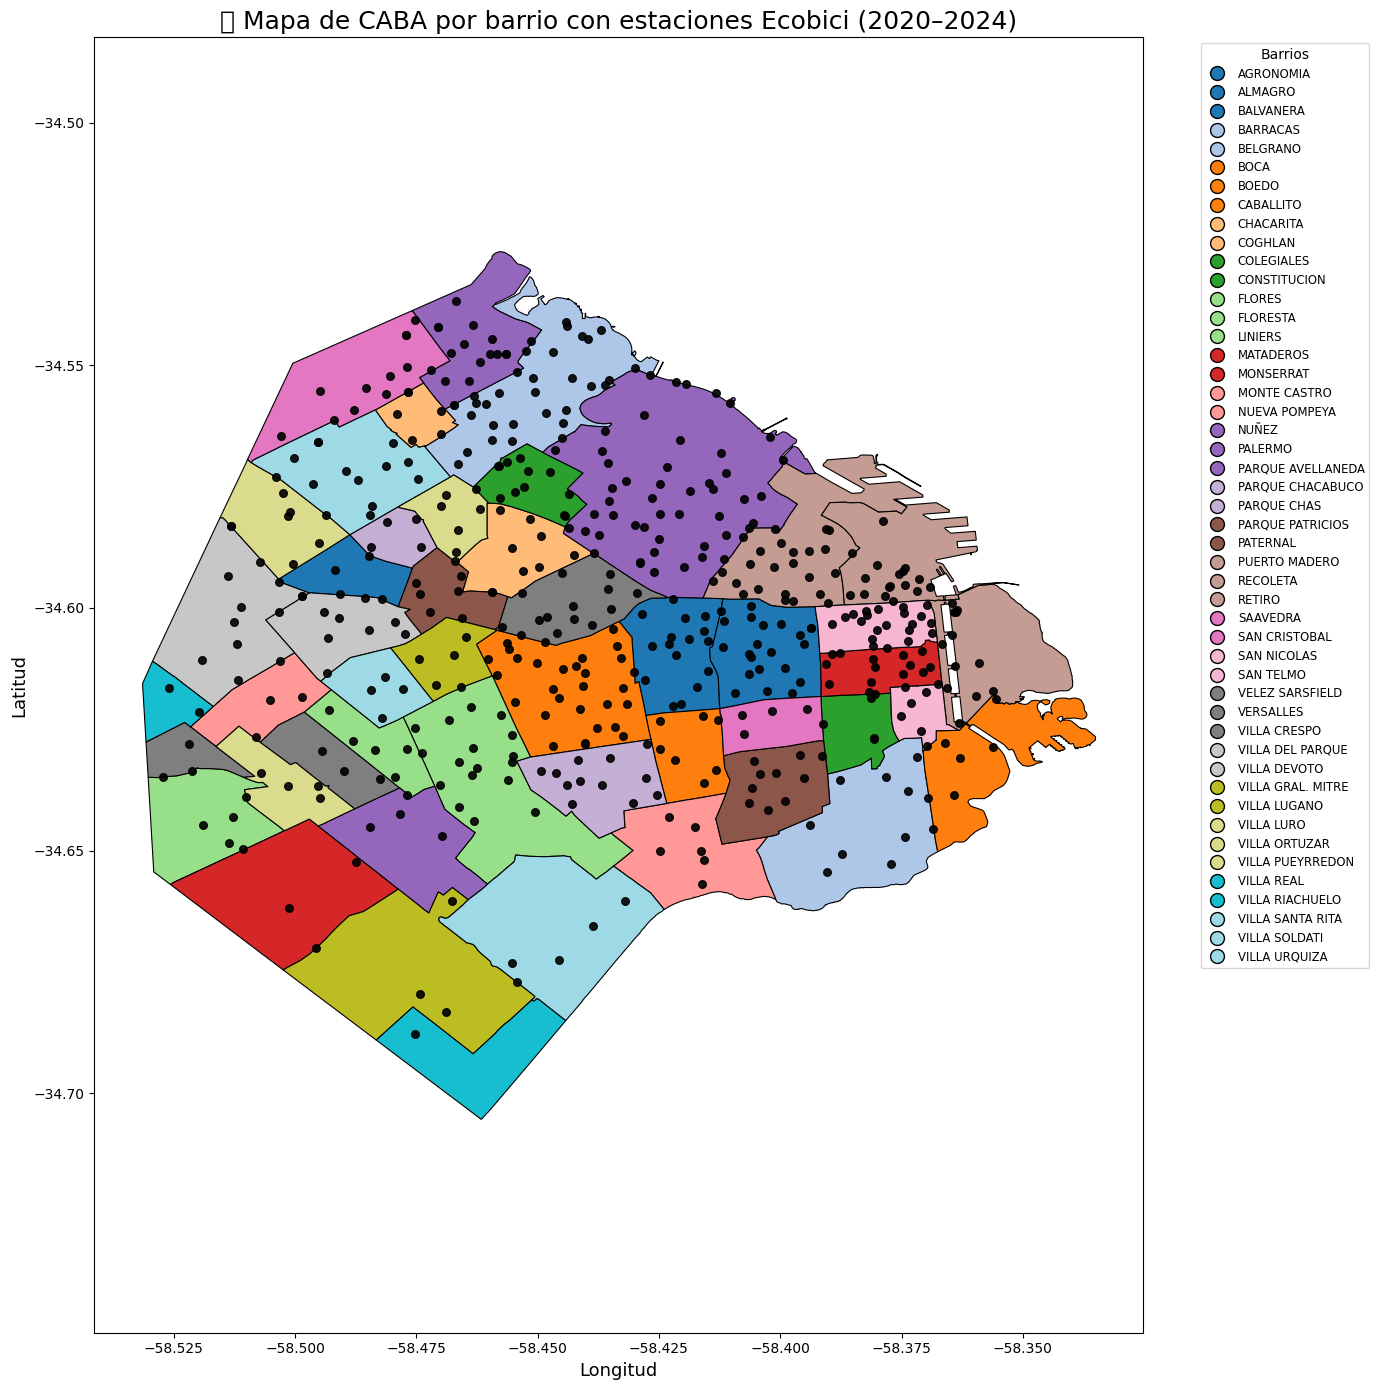

In [19]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Leer barrios
barrios_gdf = gpd.read_file("data/barrios/barrios.shp")

# Asegurarte que estaciones_con_barrios ya tiene "geometry"
# y que es un GeoDataFrame con el mismo CRS

import matplotlib.cm as cm

# Lista de colores automáticos (pueden reemplazarse por hardcodeados si preferís)
barrios_unicos = sorted(barrios_gdf["nombre"].unique())
cmap = cm.get_cmap("tab20", len(barrios_unicos))
color_dict = {barrio: cmap(i) for i, barrio in enumerate(barrios_unicos)}

plt.figure(figsize=(14, 14))
ax = plt.gca()

# Pintar los barrios con sus polígonos coloreados
for barrio, shape in barrios_gdf.groupby("nombre"):
    shape.plot(ax=ax, color=color_dict[barrio], edgecolor="black", linewidth=0.8, label=barrio)

# Agregar las estaciones como puntos rojos con borde negro
estaciones_con_barrios.plot(ax=ax, color="black", edgecolor="black", markersize=30, alpha=0.9)

# Estética
plt.title("🗺️ Mapa de CABA por barrio con estaciones Ecobici (2020–2024)", fontsize=18)
plt.xlabel("Longitud", fontsize=13)
plt.ylabel("Latitud", fontsize=13)
plt.axis("equal")

# Leyenda con nombres de barrio
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_dict[barrio],
                      markeredgecolor='black', markersize=10, label=barrio)
           for barrio in barrios_unicos]
plt.legend(handles=handles, title="Barrios", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize="small")

plt.tight_layout()
plt.show()

C:\Users\catal\AppData\Local\Temp\ipykernel_29604\1098386498.py:44: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)
C:\Users\catal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\geopandas\plotting.py:485: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  ax.figure.canvas.draw_idle()
C:\Users\catal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\geopandas\plotting.py:485: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  ax.figure.canvas.draw_idle()
C:\Users\catal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\geopandas\plotting.py:485: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  ax.f

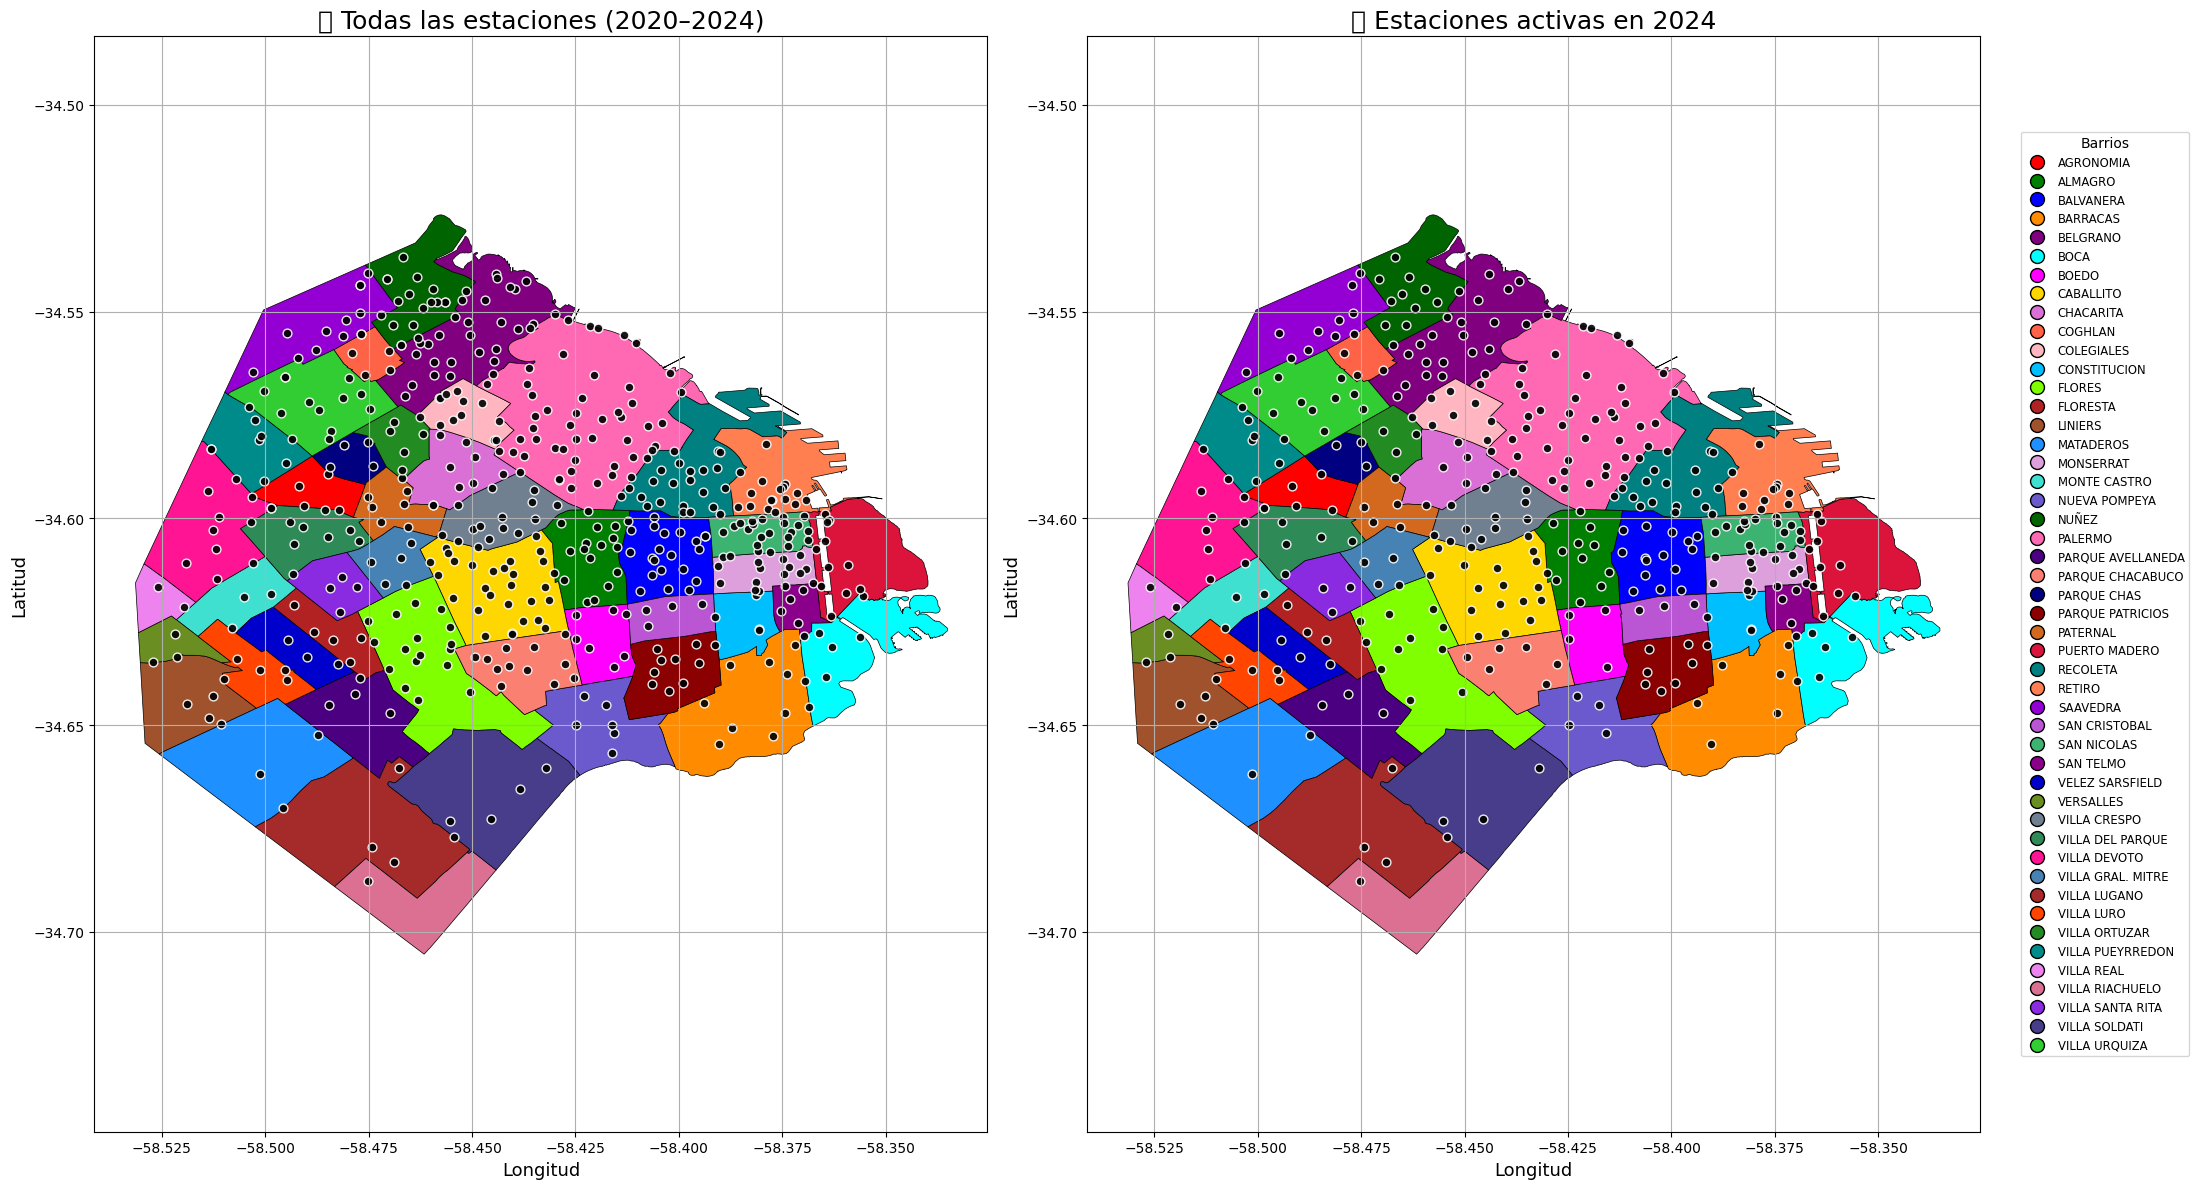

In [20]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from matplotlib.lines import Line2D

# ----------------------
# COLORES HARDCODEADOS
# ----------------------
colores_barrios = [
    "red", "green", "blue", "darkorange", "purple", "cyan", "magenta", "gold",
    "orchid", "tomato", "lightpink", "deepskyblue", "chartreuse", "firebrick", "sienna", "dodgerblue",
    "plum", "turquoise", "slateblue", "darkgreen", "hotpink", "indigo", "salmon", "navy",
    "darkred", "chocolate", "crimson", "teal", "coral", "darkviolet", "mediumorchid", "mediumseagreen",
    "darkmagenta", "mediumblue", "olivedrab", "slategray", "seagreen", "deeppink", "steelblue", "brown",
    "orangered", "forestgreen", "darkcyan", "violet", "palevioletred", "blueviolet", "darkslateblue", "limegreen"
]

# ----------------------
# CARGAR BARRIOS
# ----------------------
barrios_gdf = gpd.read_file("data/barrios/barrios.shp")
barrios_gdf = barrios_gdf.to_crs(epsg=4326)  # Asegurar sistema de referencia compatible

# Asignar color a cada barrio
barrios_unicos = sorted(barrios_gdf["nombre"].unique())
assert len(colores_barrios) == len(barrios_unicos), "La cantidad de colores no coincide con la de barrios"
color_dict = {barrio: colores_barrios[i] for i, barrio in enumerate(barrios_unicos)}

# ----------------------
# CARGAR ESTACIONES DE TODOS LOS AÑOS
# ----------------------
archivos = [
    "data/recorridos/processed/trips_2024_pr.csv",
    "data/recorridos/processed/trips_2023_pr.csv",
    "data/recorridos/processed/trips_2022_pr.csv",
    "data/recorridos/processed/trips_2021_pr.csv",
    "data/recorridos/processed/trips_2020_pr.csv"
]

estaciones_dict = {}

for path in archivos:
    df = pd.read_csv(path)
    for rol in ["origen", "destino"]:
        for _, row in df.iterrows():
            est_id = row[f"id_estacion_{rol}"]
            lat = row[f"lat_estacion_{rol}"]
            lon = row[f"long_estacion_{rol}"]
            if pd.notna(est_id) and pd.notna(lat) and pd.notna(lon):
                if est_id not in estaciones_dict:
                    estaciones_dict[est_id] = (lat, lon)

# GeoDataFrame de TODAS las estaciones
df_estaciones_todas = pd.DataFrame([
    {"id_estacion": est_id, "lat": lat, "lon": lon}
    for est_id, (lat, lon) in estaciones_dict.items()
])
df_estaciones_todas["geometry"] = df_estaciones_todas.apply(lambda row: Point(row["lon"], row["lat"]), axis=1)
gdf_estaciones_todas = gpd.GeoDataFrame(df_estaciones_todas, geometry="geometry", crs="EPSG:4326")

# GeoDataFrame de estaciones 2024
df_2024 = pd.read_csv("data/recorridos/processed/trips_2024_pr.csv")
estaciones_2024 = {}

for rol in ["origen", "destino"]:
    for _, row in df_2024.iterrows():
        est_id = row[f"id_estacion_{rol}"]
        lat = row[f"lat_estacion_{rol}"]
        lon = row[f"long_estacion_{rol}"]
        if pd.notna(est_id) and pd.notna(lat) and pd.notna(lon):
            if est_id not in estaciones_2024:
                estaciones_2024[est_id] = (lat, lon)

df_estaciones_2024 = pd.DataFrame([
    {"id_estacion": est_id, "lat": lat, "lon": lon}
    for est_id, (lat, lon) in estaciones_2024.items()
])
df_estaciones_2024["geometry"] = df_estaciones_2024.apply(lambda row: Point(row["lon"], row["lat"]), axis=1)
gdf_estaciones_2024 = gpd.GeoDataFrame(df_estaciones_2024, geometry="geometry", crs="EPSG:4326")

# ----------------------
# PLOTEO
# ----------------------
fig, axes = plt.subplots(1, 2, figsize=(20, 12))
ax1, ax2 = axes

# PLOT 1: todas las estaciones
for barrio, shape in barrios_gdf.groupby("nombre"):
    shape.plot(ax=ax1, color=color_dict[barrio], edgecolor="black", linewidth=0.5)

gdf_estaciones_todas.plot(ax=ax1, color="black", edgecolor="white", markersize=40, alpha=0.9)
ax1.set_title("📍 Todas las estaciones (2020–2024)", fontsize=18)
ax1.set_xlabel("Longitud", fontsize=13)
ax1.set_ylabel("Latitud", fontsize=13)
ax1.axis("equal")
ax1.grid(True)

# PLOT 2: estaciones solo de 2024
for barrio, shape in barrios_gdf.groupby("nombre"):
    shape.plot(ax=ax2, color=color_dict[barrio], edgecolor="black", linewidth=0.5)

gdf_estaciones_2024.plot(ax=ax2, color="black", edgecolor="white", markersize=40, alpha=0.9)
ax2.set_title("📍 Estaciones activas en 2024", fontsize=18)
ax2.set_xlabel("Longitud", fontsize=13)
ax2.set_ylabel("Latitud", fontsize=13)
ax2.axis("equal")
ax2.grid(True)

# LEYENDA COMÚN
handles = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=color_dict[barrio],
           markeredgecolor='black', markersize=10, label=barrio)
    for barrio in barrios_unicos
]

fig.legend(handles=handles, title="Barrios", loc="center left", bbox_to_anchor=(1.01, 0.5), fontsize="small")
plt.tight_layout()
plt.show()

In [21]:
import pandas as pd
import os

# Años relevantes
anios_recorridos = [2020, 2021, 2022, 2023, 2024]
anios_usuarios_nuevos = [2015, 2016, 2017, 2018, 2019]

# === 1. Cargar todos los usuarios que aparecen en recorridos ===
usuarios_recorridos = []

for anio in anios_recorridos:
    path = f"data/recorridos/processed/trips_{anio}_pr.csv"
    if os.path.exists(path):
        df = pd.read_csv(path, usecols=["id_usuario"])
        df = df.dropna().astype({"id_usuario": int})
        df["año_recorrido"] = anio
        usuarios_recorridos.append(df)
    else:
        print(f"⚠️ No se encontró archivo de recorridos {anio}")

df_usuarios_recorridos = pd.concat(usuarios_recorridos, ignore_index=True)

# === 2. Cargar todos los usuarios de 2020–2024 ===
usuarios_registrados = []

for anio in anios_recorridos:
    path = f"data/usuarios/processed/usuarios_ecobici_{anio}_limpio.csv"
    if os.path.exists(path):
        df = pd.read_csv(path, usecols=["ID_usuario"])
        df = df.dropna().astype({"ID_usuario": int})
        usuarios_registrados.append(df)
    else:
        print(f"⚠️ No se encontró archivo de usuarios {anio}")

df_usuarios_registrados = pd.concat(usuarios_registrados, ignore_index=True)
usuarios_2020_2024_set = set(df_usuarios_registrados["ID_usuario"].unique())

# === 3. Detectar usuarios no registrados entre 2020–2024 ===
df_no_registrados = df_usuarios_recorridos[
    ~df_usuarios_recorridos["id_usuario"].isin(usuarios_2020_2024_set)
].copy()

# === 4. Cargar usuarios de 2015–2019 desde new_data/ y limpiar comillas ===
usuarios_extra = []

for anio in anios_usuarios_nuevos:
    path = f"data/new_data/processed/usuarios_ecobici_{anio}_limpio.csv"
    if os.path.exists(path):
        df = pd.read_csv(path, dtype=str)
        df.columns = [col.replace('"', '') for col in df.columns]
        df = df.applymap(lambda x: x.replace('"', '') if isinstance(x, str) else x)
        df["ID_usuario"] = df["ID_usuario"].astype(int)
        df["año_archivo"] = anio
        usuarios_extra.append(df[["ID_usuario", "año_archivo"]])
    else:
        print(f"⚠️ No se encontró archivo de usuarios nuevos {anio}")

df_usuarios_extra = pd.concat(usuarios_extra, ignore_index=True)
usuarios_2015_2019_set = set(df_usuarios_extra["ID_usuario"].unique())

# === 5. Para cada año de recorridos, ver cuántos de los faltantes aparecen en 2015–2019 ===
resultados = []

for anio in sorted(df_no_registrados["año_recorrido"].unique()):
    usuarios_en_anio = df_no_registrados[df_no_registrados["año_recorrido"] == anio]["id_usuario"].unique()
    total = len(usuarios_en_anio)
    encontrados = sum(uid in usuarios_2015_2019_set for uid in usuarios_en_anio)
    no_encontrados = total - encontrados

    resultados.append({
        "año_recorrido": anio,
        "usuarios_faltantes_2020_2024": total,
        "encontrados_en_2015_2019": encontrados,
        "siguen_sin_aparecer": no_encontrados
    })

# === 6. Mostrar resultado final ===
df_resultado = pd.DataFrame(resultados)
print("🔍 Usuarios de recorridos no encontrados en 2020–2024, pero sí en 2015–2019:")
print(df_resultado)

# Opcional: guardar a CSV
# df_resultado.to_csv("usuarios_encontrados_en_2015_2019.csv", index=False)

C:\Users\catal\AppData\Local\Temp\ipykernel_29604\1615495101.py:51: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.replace('"', '') if isinstance(x, str) else x)
C:\Users\catal\AppData\Local\Temp\ipykernel_29604\1615495101.py:51: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.replace('"', '') if isinstance(x, str) else x)
C:\Users\catal\AppData\Local\Temp\ipykernel_29604\1615495101.py:51: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.replace('"', '') if isinstance(x, str) else x)
C:\Users\catal\AppData\Local\Temp\ipykernel_29604\1615495101.py:51: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.replace('"', '') if isinstance(x, str) else x)
C:\Users\catal\AppData\Local\Temp\ipykernel_29604\1615495101.py:51: FutureWarning: DataF

🔍 Usuarios de recorridos no encontrados en 2020–2024, pero sí en 2015–2019:
   año_recorrido  usuarios_faltantes_2020_2024  encontrados_en_2015_2019  \
0           2020                        166099                     86137   
1           2021                         79355                     53825   
2           2022                         65936                     48262   
3           2023                         49934                     36534   
4           2024                         35990                     25368   

   siguen_sin_aparecer  
0                79962  
1                25530  
2                17674  
3                13400  
4                10622  


In [22]:

usuarios_totalmente_desconocidos = set(df_no_registrados["id_usuario"]) - usuarios_2015_2019_set

# Filtrar el DataFrame original de recorridos
df_filas_desconocidas = df_usuarios_recorridos[
    df_usuarios_recorridos["id_usuario"].isin(usuarios_totalmente_desconocidos)
]

# Agrupar por año y contar
conteo_filas_por_anio = df_filas_desconocidas.groupby("año_recorrido").size().reset_index(name="filas_totales_usuarios_desconocidos")

print("\n📊 Filas generadas por usuarios que no aparecen en ningún archivo (ni 2015–2019 ni 2020–2024):")
print(conteo_filas_por_anio)



📊 Filas generadas por usuarios que no aparecen en ningún archivo (ni 2015–2019 ni 2020–2024):
   año_recorrido  filas_totales_usuarios_desconocidos
0           2020                               625642
1           2021                               352288
2           2022                               208369
3           2023                               145392
4           2024                               139739


# Armado DS

In [23]:
import pandas as pd
import os

# Cargar viajes
recorridos_dir = "data/recorridos/processed"
df_viajes = pd.concat([
    pd.read_csv(os.path.join(recorridos_dir, f))
    for f in sorted(os.listdir(recorridos_dir))
    if f.endswith(".csv")
], ignore_index=True)

# Cargar usuarios
usuarios_dir = "data/usuarios/processed"
df_usuarios = pd.concat([
    pd.read_csv(os.path.join(usuarios_dir, f))
    for f in sorted(os.listdir(usuarios_dir))
    if f.endswith(".csv")
], ignore_index=True)

# Cargar estaciones
df_estaciones = pd.read_csv("data/estaciones_con_barrios.csv")  # debe tener id_estacion, barrio, lat, lon
from modeling import construir_dataset_modelado_v2

df_modelado = construir_dataset_modelado_v2(df_viajes, df_usuarios, df_estaciones)
df_modelado.to_csv("data/modelado/ds_modelado.csv", index=False)

C:\Users\catal\AppData\Local\Temp\ipykernel_29604\1036338950.py:7: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv(os.path.join(recorridos_dir, f))
C:\Users\catal\AppData\Local\Temp\ipykernel_29604\1036338950.py:15: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv(os.path.join(usuarios_dir, f))
C:\Users\catal\AppData\Local\Temp\ipykernel_29604\1036338950.py:15: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv(os.path.join(usuarios_dir, f))
C:\Users\catal\AppData\Local\Temp\ipykernel_29604\1036338950.py:15: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv(os.path.join(usuarios_dir, f))
c:\Users\catal\OneDrive\Documents\UDESA\AñoIII\Machine Learning\Proyecto_Final\FINAL_ML\modeling.py:22: DtypeWarning: Columns (1) have mixed types

In [24]:
mapa_estaciones = {
    "verano": 1,
    "otono": 2,
    "invierno": 3,
    "primavera": 4
}

df_modelado["estacion_del_anio"] = df_modelado["estacion_del_anio"].map(mapa_estaciones).astype(int)
df_modelado["fecha_origen_recorrido"] = pd.to_datetime(df_modelado["fecha_origen_recorrido"], errors="coerce")
df_modelado["fecha_destino_recorrido"] = pd.to_datetime(df_modelado["fecha_destino_recorrido"], errors="coerce")
df_modelado["fecha_intervalo"] = pd.to_datetime(df_modelado["fecha_intervalo"], errors="coerce")

df_modelado["año_origen"] = df_modelado["fecha_origen_recorrido"].dt.year
df_modelado["mes_origen"] = df_modelado["fecha_origen_recorrido"].dt.month
df_modelado["dia_origen"] = df_modelado["fecha_origen_recorrido"].dt.day
df_modelado["hora_origen"] = df_modelado["fecha_origen_recorrido"].dt.hour
df_modelado["minuto_origen"] = df_modelado["fecha_origen_recorrido"].dt.minute
df_modelado["segundo_origen"] = df_modelado["fecha_origen_recorrido"].dt.second

df_modelado["año_destino"] = df_modelado["fecha_destino_recorrido"].dt.year
df_modelado["mes_destino"] = df_modelado["fecha_destino_recorrido"].dt.month
df_modelado["dia_destino"] = df_modelado["fecha_destino_recorrido"].dt.day
df_modelado["hora_destino"] = df_modelado["fecha_destino_recorrido"].dt.hour
df_modelado["minuto_destino"] = df_modelado["fecha_destino_recorrido"].dt.minute
df_modelado["segundo_destino"] = df_modelado["fecha_destino_recorrido"].dt.second

df_modelado["año_intervalo"] = df_modelado["fecha_intervalo"].dt.year
df_modelado["mes_intervalo"] = df_modelado["fecha_intervalo"].dt.month
df_modelado["dia_intervalo"] = df_modelado["fecha_intervalo"].dt.day
df_modelado["hora_intervalo"] = df_modelado["fecha_intervalo"].dt.hour
df_modelado["minuto_intervalo"] = df_modelado["fecha_intervalo"].dt.minute

df_modelado["edad_usuario"] = pd.to_numeric(df_modelado["edad_usuario"], errors="coerce").fillna(-1).astype(int)

barrios_unicos = pd.unique(df_modelado[["barrio_origen", "barrio_destino"]].values.ravel())
mapa_barrio = {barrio: i for i, barrio in enumerate(barrios_unicos, start=1)}

df_modelado["barrio_origen"] = df_modelado["barrio_origen"].map(mapa_barrio)
df_modelado["barrio_destino"] = df_modelado["barrio_destino"].map(mapa_barrio)
df_modelado["modelo_bicicleta"] = df_modelado["modelo_bicicleta"].map({"ICONIC": 1, "FIT": 0}).astype(int)

df_modelado.drop(columns=["hora_dia"], inplace=True)
df_modelado.drop(columns=["fecha_origen_recorrido", "fecha_destino_recorrido", "fecha_intervalo"], inplace=True)

df_modelado.to_csv("data/modelado/ds_modelado.csv", index=False)

In [25]:
df_modelado.dtypes

id_recorrido                              int64
duracion_recorrido                        int64
id_estacion_origen                        int64
id_estacion_destino                       int64
id_usuario                              float64
modelo_bicicleta                          int64
barrio_origen                             int64
barrio_destino                            int64
dia_semana                                int32
es_finde                                  int64
estacion_del_anio                         int64
edad_usuario                              int64
año_alta                                float64
mes_alta                                float64
genero_FEMALE                           float64
genero_MALE                             float64
genero_OTHER                            float64
usuario_registrado                        int64
zona_destino_cluster                      int64
zona_origen_cluster                       int64
cantidad_estaciones_cercanas_destino    

In [5]:
import pandas as pd

# Cargar el dataset modelado real
df = pd.read_csv("data/modelado/ds_modelado.csv")

# Crear la columna de fecha/hora para orden temporal
df["fecha_intervalo"] = pd.to_datetime(dict(
    year=df["año_intervalo"],
    month=df["mes_intervalo"],
    day=df["dia_intervalo"],
    hour=df["hora_intervalo"],
    minute=df["minuto_intervalo"]
))

# Ordenar por estación y tiempo
df = df.sort_values(by=["id_estacion_origen", "fecha_intervalo"]).copy()

# Agregar rolling promedio (solo usando datos anteriores, no incluye el actual)
df["N_SALIDAS_PROM_2INT"] = (
    df.groupby("id_estacion_origen")["N_salidas_intervalo"]
      .shift(1)
      .rolling(window=2)
      .mean()
      .reset_index(drop=True)
)

df["N_ARRIBOS_PROM_2INT"] = (
    df.groupby("id_estacion_origen")["N_arribos_intervalo"]
      .shift(1)
      .rolling(window=2)
      .mean()
      .reset_index(drop=True)
)

# Nuevas: lags de 1, 2 y 3 para salidas y arribos
for lag in [1, 2, 3]:
    df[f"N_SALIDAS_LAG{lag}"] = (
        df.groupby("id_estacion_origen")["N_salidas_intervalo"].shift(lag)
    )
    df[f"N_ARRIBOS_LAG{lag}"] = (
        df.groupby("id_estacion_origen")["N_arribos_intervalo"].shift(lag)
    )

# Nuevas: lags para columnas que terminan en 'destino'
columnas_destino = [col for col in df.columns if col.endswith("destino")]
for col in columnas_destino:
    for lag in [1, 2, 3]:
        df[f"{col}_LAG{lag}"] = df.groupby("id_estacion_destino")[col].shift(lag)


df.to_csv("data/modelado/ds_modelado.csv", index=False)

In [6]:
print(df.isna().sum()[df.isna().sum() > 0])


N_SALIDAS_PROM_2INT                           726
N_ARRIBOS_PROM_2INT                           726
N_SALIDAS_LAG1                                363
N_ARRIBOS_LAG1                                363
N_SALIDAS_LAG2                                726
N_ARRIBOS_LAG2                                726
N_SALIDAS_LAG3                               1089
N_ARRIBOS_LAG3                               1089
id_estacion_destino_LAG1                      501
id_estacion_destino_LAG2                     1000
id_estacion_destino_LAG3                     1499
barrio_destino_LAG1                           501
barrio_destino_LAG2                          1000
barrio_destino_LAG3                          1499
cantidad_estaciones_cercanas_destino_LAG1     501
cantidad_estaciones_cercanas_destino_LAG2    1000
cantidad_estaciones_cercanas_destino_LAG3    1499
año_destino_LAG1                              501
año_destino_LAG2                             1000
año_destino_LAG3                             1499


✅ ¿Qué causaba esos NaN?
Todos venían de funciones como shift() y rolling(). Específicamente:

🔁 shift():
Ejemplo: df.groupby('id_estacion_origen')["N_salidas_intervalo"].shift(1)

Significa: "dame el valor anterior".

✅ El primer valor de cada grupo no tiene un anterior, entonces el NaN es esperado y correcto.

📉 rolling():
Ejemplo: .rolling(window=2).mean()

Si se usa con shift(), los primeros 1 o 2 valores (dependiendo del window) van a dar NaN porque no hay suficientes observaciones anteriores.

➕ Aplicado a columnas como:
N_SALIDAS_PROM_2INT, N_ARRIBOS_LAG1, etc.

También a todos los *_LAG* aplicados a columnas *_destino (por ejemplo hora_destino_LAG1), que usan shift() agrupado por id_estacion_destino.

In [7]:
# --- Agrupar columnas según tipo de imputación adecuada ---
cols_promedios = [col for col in df.columns if "PROM" in col or "LAG" in col and "N_" in col]
# Para los primeros valores, se llena de 0, ya que son promedios o conteos
df[cols_promedios] = df[cols_promedios].fillna(0)



cols_id = [col for col in df.columns if col.startswith("id_") and "LAG" in col]
cols_tiempo = [col for col in df.columns if any(t in col for t in ['año_', 'mes_', 'dia_', 'hora_', 'minuto_', 'segundo_']) and 'LAG' in col]
cols_barrio = [col for col in df.columns if "barrio" in col and "LAG" in col]
cols_estaciones = [col for col in df.columns if "cantidad_estaciones" in col and "LAG" in col]
#como son categorías, se llenan con -1
#en vez de poner 0 que representa una categoría válida, se usa -1 para indicar que no hay información



df[cols_id + cols_barrio + cols_tiempo + cols_estaciones] = df[cols_id + cols_barrio + cols_tiempo + cols_estaciones].fillna(-1)


In [8]:
df.to_csv("data/modelado/ds_modelado.csv", index=False)

In [9]:
# Filtrar solo columnas que pudieron tener -1 por imputación
cols_menos_uno = [col for col in df.columns if df[col].isin([-1]).any()]

pd.Series({col: (df[col] == -1).sum() for col in cols_menos_uno}) \
  .sort_values(ascending=False) \
  .to_frame("Cantidad de -1")


,Cantidad de -1
edad_usuario,1342472
cantidad_estaciones_cercanas_destino_LAG3,1499
minuto_destino_LAG3,1499
hora_destino_LAG3,1499
dia_destino_LAG3,1499
mes_destino_LAG3,1499
año_destino_LAG3,1499
segundo_destino_LAG3,1499
barrio_destino_LAG3,1499
id_estacion_destino_LAG3,1499


In [1]:
import pandas as pd

# === Cargar dataset ===
df = pd.read_csv("data/modelado/ds_modelado.csv", parse_dates=["fecha_intervalo"])

# === Crear columna de referencia (la estación a la que querés predecir arribos) ===
df["estacion_referencia"] = df["id_estacion_destino"]

# === Eliminar columnas anteriores de arribos, salidas y lags ===
cols_a_eliminar = [col for col in df.columns if (
    col.startswith("N_ARRIBOS_LAG") or 
    col.startswith("N_SALIDAS_LAG") or 
    col in ["N_arribos_intervalo", "N_salidas_intervalo"]
)]
df = df.drop(columns=cols_a_eliminar)

# === Recalcular N_arribos_intervalo ===
arribos = (
    df.groupby(["estacion_referencia", "fecha_intervalo"])
    .size()
    .rename("N_arribos_intervalo")
    .reset_index()
)

# === Recalcular N_salidas_intervalo (asociadas a la estación_referencia) ===
salidas = (
    df[df["id_estacion_origen"].notna()]
    .groupby(["id_estacion_origen", "fecha_intervalo"])
    .size()
    .rename("N_salidas_intervalo")
    .reset_index()
    .rename(columns={"id_estacion_origen": "estacion_referencia"})
)

# === Merge con el dataset original ===
df = df.merge(arribos, on=["estacion_referencia", "fecha_intervalo"], how="left")
df = df.merge(salidas, on=["estacion_referencia", "fecha_intervalo"], how="left")

# === Completar con ceros donde no hubo actividad ===
df["N_arribos_intervalo"] = df["N_arribos_intervalo"].fillna(0).astype(int)
df["N_salidas_intervalo"] = df["N_salidas_intervalo"].fillna(0).astype(int)

# === Recalcular lags respecto a estacion_referencia ===
df = df.sort_values(["estacion_referencia", "fecha_intervalo"])

for lag in [1, 2, 3, 4, 5, 6]:
    df[f"N_ARRIBOS_LAG{lag}"] = (
        df.groupby("estacion_referencia")["N_arribos_intervalo"].shift(lag)
    )
    df[f"N_SALIDAS_LAG{lag}"] = (
        df.groupby("estacion_referencia")["N_salidas_intervalo"].shift(lag)
    )

# === Guardar dataset actualizado ===
df.to_csv("data/modelado/ds_modelado_ref.csv", index=False)
print("✅ Guardado como 'data/modelado/ds_modelado_ref.csv'")

✅ Guardado como 'data/modelado/ds_modelado_ref.csv'
